### Correlation between Mean of Absolute Differences and Total Residuals

### Import libraries and set plotting style

In [1]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error
import warnings

sys.path.append('../scr')
from data_preprocessing import *
from analysis import *
from utils import *
from plot import *


 ### Feature Numbers and Model Types

In [2]:
feature_numbers = ['2', '7', '9']  
model_types = ['LP','RP']  

### Loading and Cleaning Data

In [10]:
id_compas, _, df_2, df_7, df_9, df_minus_two, df_5 = preprocess_compas_data()

In [8]:
df_predictions = load_and_clean_predictions('compas','predictions',feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/compas_predictions_2LP_1104_2259.csv for model 2LP
Loaded file: ../predictions/compas_predictions_2RP_nodate.csv for model 2RP
Loaded file: ../predictions/compas_predictions_7LP_nodate.csv for model 7LP
Loaded file: ../predictions/compas_predictions_7RP_nodate.csv for model 7RP
Loaded file: ../predictions/compas_predictions_9LP_nodate.csv for model 9LP
Loaded file: ../predictions/compas_predictions_9RP_nodate.csv for model 9RP


### Predicting Features in 𝐵 with Models Trained on 𝐴∖𝐵

In [11]:
lr_models_for_B = feature_dependency_models(df_5, df_2, model_type="linear")
rf_models_for_B = feature_dependency_models(df_5, df_2, model_type="random_forest")


### Computing Total Residuals for Individuals

In [12]:
lr_total_residuals = compute_total_residuals(df_5, df_2, lr_models_for_B, id_compas)

 # 132 minutes to run

Processing individual 1/6172
Processing individual 2/6172
Processing individual 3/6172
Processing individual 4/6172
Processing individual 5/6172
Processing individual 6/6172
Processing individual 7/6172
Processing individual 8/6172
Processing individual 9/6172
Processing individual 10/6172
Processing individual 11/6172
Processing individual 12/6172
Processing individual 13/6172
Processing individual 14/6172
Processing individual 15/6172
Processing individual 16/6172
Processing individual 17/6172
Processing individual 18/6172
Processing individual 19/6172
Processing individual 20/6172
Processing individual 21/6172
Processing individual 22/6172
Processing individual 23/6172
Processing individual 24/6172
Processing individual 25/6172
Processing individual 26/6172
Processing individual 27/6172
Processing individual 28/6172
Processing individual 29/6172
Processing individual 30/6172
Processing individual 31/6172
Processing individual 32/6172
Processing individual 33/6172
Processing individu

In [ ]:
rf_total_residuals = compute_total_residuals(df_5, df_2,rf_models_for_B, id_compas)
 # 524 minutes to run

Processing individual 1/6172
Processing individual 2/6172
Processing individual 3/6172
Processing individual 4/6172
Processing individual 5/6172
Processing individual 6/6172
Processing individual 7/6172
Processing individual 8/6172
Processing individual 9/6172
Processing individual 10/6172
Processing individual 11/6172
Processing individual 12/6172
Processing individual 13/6172
Processing individual 14/6172
Processing individual 15/6172
Processing individual 16/6172
Processing individual 17/6172
Processing individual 18/6172
Processing individual 19/6172
Processing individual 20/6172
Processing individual 21/6172
Processing individual 22/6172
Processing individual 23/6172
Processing individual 24/6172
Processing individual 25/6172
Processing individual 26/6172
Processing individual 27/6172
Processing individual 28/6172
Processing individual 29/6172
Processing individual 30/6172
Processing individual 31/6172
Processing individual 32/6172
Processing individual 33/6172
Processing individu

In [14]:
print(lr_total_residuals)
print(rf_total_residuals)

      id_dataset  total_residual
0              1       39.840216
1              3       28.573160
2              4       19.356480
3              7       18.083163
4              8       29.852386
...          ...             ...
6167       10996       35.629484
6168       10997       39.292171
6169       10999       30.027125
6170       11000       30.999076
6171       11001       64.577903

[6172 rows x 2 columns]
      id_dataset  total_residual
0              1       30.151041
1              3       24.816795
2              4       15.566091
3              7       15.414692
4              8       12.803885
...          ...             ...
6167       10996       32.735352
6168       10997       37.005324
6169       10999       27.199651
6170       11000       29.674904
6171       11001       66.222540

[6172 rows x 2 columns]


### Mean of Absolute Differences

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}


In [15]:
mean_of_abs_diff_df = {}
suffixes = ['LM', 'RM', 'LM', 'RM']

for model_type, suffix in zip(model_types, suffixes):
    abs_diff_2vs7 = compute_row_stats(
        compute_absolute_difference(
            df_predictions['2'][model_type], 
            df_predictions['7'][model_type], 
            substring_1=f'2{suffix}', 
            substring_2=f'7{suffix}'
        )
    )['mean']
    
    abs_diff_2vs9 = compute_row_stats(
        compute_absolute_difference(
            df_predictions['2'][model_type], 
            df_predictions['9'][model_type], 
            substring_1=f'2{suffix}', 
            substring_2=f'9{suffix}'
        )
    )['mean']
    
    mean_of_abs_diff_df[model_type] = pd.DataFrame({
        'abs_diff_2vs7': abs_diff_2vs7,
        'abs_diff_2vs9': abs_diff_2vs9
    })

combined_mean_of_abs_diff_df = pd.concat(mean_of_abs_diff_df, axis=1)

#print(combined_mean_of_abs_diff_df)

In [16]:
lp_abs_diff_values_2vs7 = combined_mean_of_abs_diff_df[('LP', 'abs_diff_2vs7')]
rp_abs_diff_values_2vs7= combined_mean_of_abs_diff_df[('RP', 'abs_diff_2vs7')]

In [17]:
lp_abs_diff_values_2vs9 = combined_mean_of_abs_diff_df[('LP', 'abs_diff_2vs9')]
rp_abs_diff_values_2vs9= combined_mean_of_abs_diff_df[('RP', 'abs_diff_2vs9')]

In [19]:
print(lp_abs_diff_values_2vs7)

0       0.033247
1       0.033862
2       0.111101
3       0.007931
4       0.019351
          ...   
6167    0.038381
6168    0.081426
6169    0.047545
6170    0.034495
6171    0.062981
Name: (LP, abs_diff_2vs7), Length: 6172, dtype: float64


### Correlation between Mean of Absolute Differences and Total Residuals

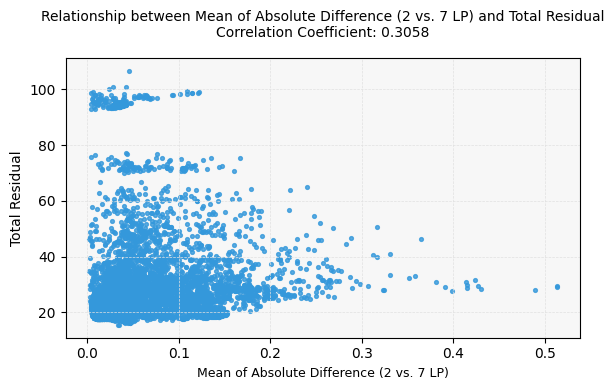

In [20]:
spearman_corr = plot_residuals_vs_differences(
    mean_diff=lp_abs_diff_values_2vs7, 
    total_residual=lr_total_residuals['total_residual'], 
    label_1='Mean of Absolute Difference (2 vs. 7 LP)'
)

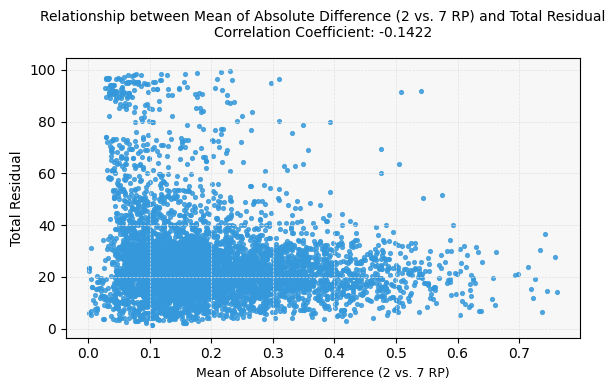

In [21]:
spearman_corr = plot_residuals_vs_differences(
    mean_diff=rp_abs_diff_values_2vs7, 
    total_residual=rf_total_residuals['total_residual'], 
    label_1='Mean of Absolute Difference (2 vs. 7 RP)')

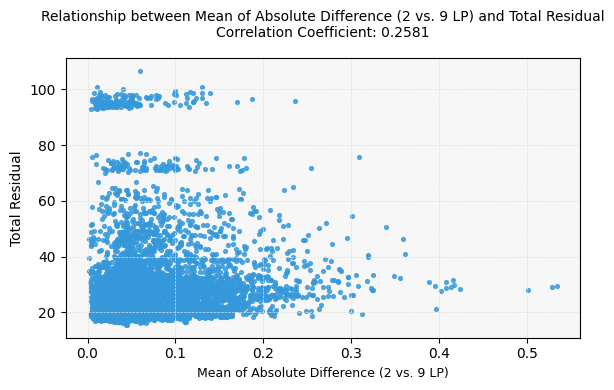

In [22]:
spearman_corr = plot_residuals_vs_differences(
    mean_diff=lp_abs_diff_values_2vs9, 
    total_residual=lr_total_residuals['total_residual'], 
    label_1='Mean of Absolute Difference (2 vs. 9 LP)'
)

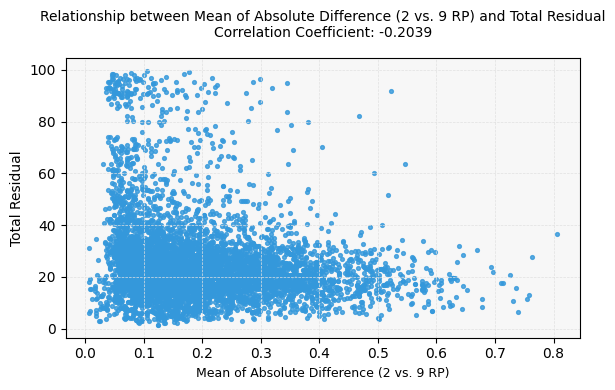

In [23]:
spearman_corr = plot_residuals_vs_differences(
    mean_diff=rp_abs_diff_values_2vs9, 
    total_residual=rf_total_residuals['total_residual'], 
    label_1='Mean of Absolute Difference (2 vs. 9 RP)'
)